<a href="https://colab.research.google.com/github/DNVena/unsupervised-predict-streamlit-template/blob/master/Movies_Recommendations_EDA(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd

In [39]:
df1 = pd.read_csv('tags.csv')
df1.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09


In [40]:
df2 = pd.read_csv('sample_submission.csv')
df2.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [41]:
df3 = pd.read_csv('genome_tags.csv')
df3.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [42]:
df4 = pd.read_csv('test.csv')
df4.head()

,userId,movieId
0,1,2011.0
1,1,4144.0
2,1,5767.0
3,1,6711.0
4,1,7318.0


In [43]:
df5 = pd.read_csv('train.csv')
df5.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1.518350e+09
1,106343,5,4.5,1.206239e+09
2,146790,5459,5.0,1.076216e+09
3,106362,32296,2.0,1.423043e+09
4,9041,366,3.0,8.333758e+08


In [44]:
df6 = pd.read_csv('movies.csv')
df6.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
df7 = pd.read_csv('links.csv')
df7.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
df8 = pd.read_csv('imdb_data.csv')
df8.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [11]:
df9 = pd.read_csv('genome_scores.csv')
df9.head()

FileNotFoundError: ignored

## **EDA**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [47]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS


In [48]:
new_df = df5.merge(df6,on='movieId', how='left')
new_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1.206239e+09,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1.076216e+09,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1.423043e+09,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,8.333758e+08,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


Heatmap

Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

We will generate a heatmap of the output of isnull() in order to detect missing values.

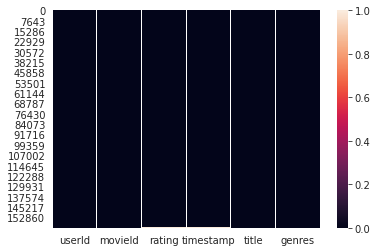

In [49]:
sns.heatmap(new_df.isnull())

Creating a ratings dataframe with average rating and number of ratings:

In [50]:
new_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Dogs of War, The (1980)                  5.0
United (2011)                            5.0
Dry Cleaning (Nettoyage à sec) (1997)    5.0
Kin (2018)                               5.0
Somebody is Waiting (1996)               5.0
Name: rating, dtype: float64

In [51]:
new_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    552
Forrest Gump (1994)                 514
Pulp Fiction (1994)                 503
Silence of the Lambs, The (1991)    489
Matrix, The (1999)                  466
Name: rating, dtype: int64

In [52]:
ratings = pd.DataFrame(new_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
$9.99 (2008),2.500
'71 (2014),3.750
'Round Midnight (1986),4.500
'Salem's Lot (2004),2.750
'Til There Was You (1997),3.375


Now set the number of ratings column

In [53]:
ratings['num of ratings'] = pd.DataFrame(new_df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
$9.99 (2008),2.500,1
'71 (2014),3.750,6
'Round Midnight (1986),4.500,1
'Salem's Lot (2004),2.750,2
'Til There Was You (1997),3.375,4


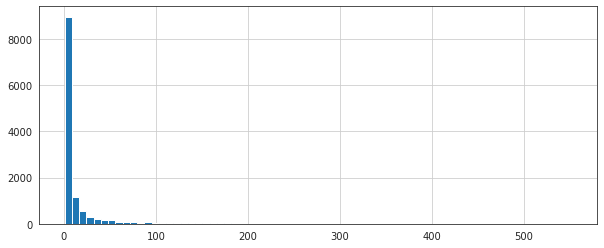

In [55]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

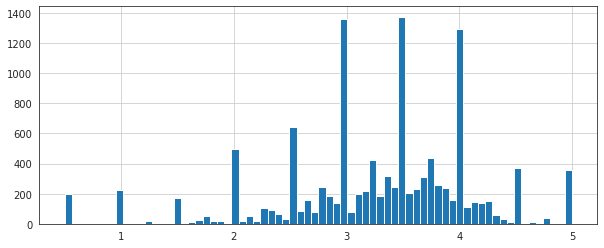

In [56]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

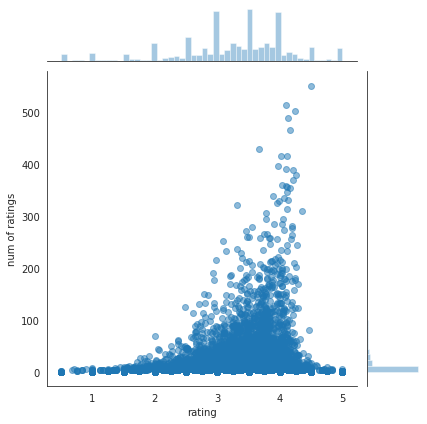

In [57]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [22]:
new_df['title'] = new_df['title'].astype('str')

In [58]:
title_corpus = ' '.join(new_df['title'])

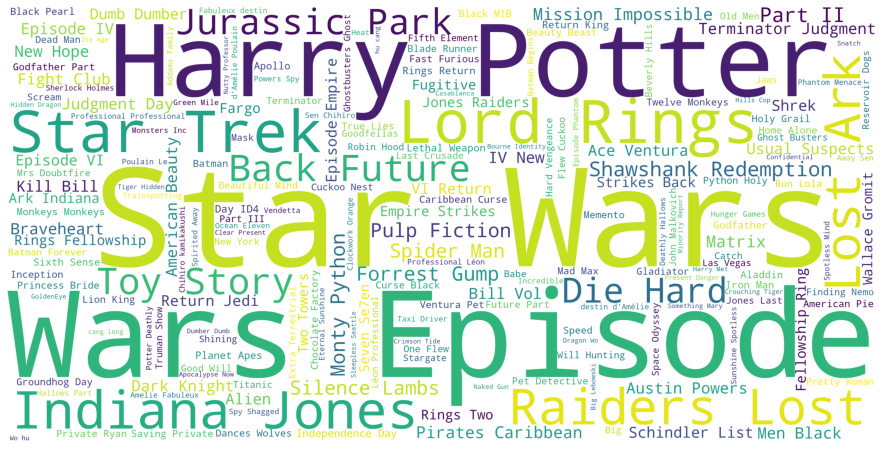

In [59]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word **Star Wars** is the most commonly used word in movie titles. Lord Rings, Harry Potter and Trek are also among the most commonly occuring words. I think this encapsulates the idea of the ubiquitious presence of fantasy in movies pretty well.

In [60]:
movies = df8[df8.plot_keywords.notnull()]
number_of_keyword_chars = []
for keywords in movies['plot_keywords'][:10000]:
    n_chars = len(keywords)
    number_of_keyword_chars.append(n_chars)

<function matplotlib.pyplot.show>

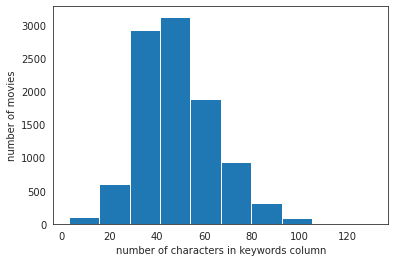

In [61]:
#Plotting a histogram showing the length (in characters) of each keyword list
plt.hist(number_of_keyword_chars)
plt.xlabel('number of characters in keywords column')
plt.ylabel('number of movies')
plt.show

In [62]:
#Now let plot a distribution for the number of words in each keyword list:
number_of_keywords = []
for keywords in movies['plot_keywords']:
    n_keywords = len(keywords.split(','))
    number_of_keywords.append(n_keywords)

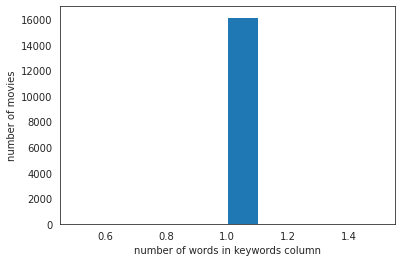

In [63]:
plt.hist(number_of_keywords)
plt.xlabel('number of words in keywords column')
plt.ylabel('number of movies')
plt.show()